# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: León Emiliano García Pérez

- ID: A00573074

- My carreer: ITC - Ingeniería en Tecnologías Computacionales


# Importing libraries

In [1]:
import numpy as np                 
import pandas as pd                
import seaborn as sns              
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [2]:
Ruta = 'datasets'
url = '/A00573074.csv'
df  = pd.read_csv(Ruta+url)

## A2 Data managment


Print the first 7 rows

In [3]:
df.head(7)

,Unnamed: 0,x1,x2
0,0,-2.010912,0.162208
1,1,-0.782666,0.607520
2,2,1.096009,0.157357
3,3,-0.818674,0.667581
4,4,-0.837438,0.429695
5,5,0.959421,0.310501
6,6,-1.589588,-0.320000


Print the first 4 last rows

In [4]:
df.tail(4)

,Unnamed: 0,x1,x2
1696,1696,0.455750,0.953701
1697,1697,-0.689099,0.807105
1698,1698,0.920377,0.059640
1699,1699,-1.992337,0.449819


How many rows and columns are in your data?

Use the `shape` method


In [5]:
df.shape

(1700, 3)

Print the name of all columns 

Use the `columns` method

In [6]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [7]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

In [8]:
# Cuando hablamos de "Filas" nos referimos a la cantidad de observaciones en nuestros datos, cuando hablamos de "columnas"
# nos referimos a la cantidad de variables presentes en nuestros datos.

# 1) La primera, que no tiene nombre, hace referencia al ID de la observación.

# 2) La segunda, contempa un valor x1.

# 3) La última, contempla un valor x2.

#...

Print a statistical summary of your columns


In [9]:
print(df.describe())

        Unnamed: 0           x1           x2
count  1700.000000  1700.000000  1700.000000
mean    849.500000    -0.499884     0.250614
std     490.892045     0.866870     0.496851
min       0.000000    -2.085251    -0.676941
25%     424.750000    -1.043326    -0.201250
50%     849.500000    -0.507351     0.251050
75%    1274.250000     0.046450     0.703929
max    1699.000000     1.125787     1.102430


In [10]:
# 1) What is the minumum and maximum values of each variable

# x1 : (Max=1.125, Min=-2.085) x2 : (Max=1.102, Min=-0.676)

# 2) What is the mean and standar deviation of each variable

# x1 : (Mean=-0.499, STD=-0.866) x2 : (Mean=0.25, STD=0.496)

# 3) What the 25%, 50% and 75% represent?

# Representa cada uno de los percentiles dentro de los datos, siendo la media
# del conjunto de datos distribuidos equitativamente en cada percentil.


Rename the columns using the same name with capital letters

In [11]:
df = df.rename(columns={"x1": "X1"})
df = df.rename(columns={"x2": "X2"})

Rename the columns to their original names

In [12]:
df = df.rename(columns={"X1": "x1"})
df = df.rename(columns={"X2": "x2"})

Use two different alternatives to get one of the columns

In [13]:
x1Column = df['x1']
print(x1Column)

0      -2.010912
1      -0.782666
2       1.096009
3      -0.818674
4      -0.837438
          ...   
1695    0.933084
1696    0.455750
1697   -0.689099
1698    0.920377
1699   -1.992337
Name: x1, Length: 1700, dtype: float64


In [14]:
x1Column = df.loc[:, 'x1']
print(x1Column)

0      -2.010912
1      -0.782666
2       1.096009
3      -0.818674
4      -0.837438
          ...   
1695    0.933084
1696    0.455750
1697   -0.689099
1698    0.920377
1699   -1.992337
Name: x1, Length: 1700, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [15]:
dFSlice = df.iloc[62:73, 1:3]
print(dFSlice)

          x1        x2
62  0.029384  0.435976
63 -0.710323 -0.376197
64 -0.883397  0.527190
65  0.763946  0.540005
66 -0.933389 -0.535076
67 -0.727642 -0.484815
68 -1.735547 -0.120321
69 -1.562122 -0.278476
70 -0.434165  0.885711
71 -0.830543 -0.495251
72 -0.269833 -0.194270


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [16]:
howManyNulls = df[['x1', 'x2']].isnull().sum()
howManyNotNulls = df[['x1', 'x2']].notnull().sum()
print('Null:\n', howManyNulls)
print()
print('!Null:\n', howManyNotNulls)

print()
print()

howManyRows = len(df)
showManyNullsAndNotNulls = howManyNulls + howManyNotNulls
print('Rows:\n', howManyRows)
print()
print('Nulls&!Nulls:\n', showManyNullsAndNotNulls.sum()/2)


Null:
 x1    0
x2    0
dtype: int64

!Null:
 x1    1700
x2    1700
dtype: int64


Rows:
 1700

Nulls&!Nulls:
 1700.0


Discard the first column


In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)

### Questions 

Based on the previos results, provide a description of yout dataset

Your response: Los datos necesitaban cierto tratamiento, por ejemplo: el quitar columnas que fuesen redundantes dentro del contexto de análisis de nuestros datos. Así mismo, cabe destacar que dentro de la limpieza, se logró verificar que en nuestro data frame no había valores nulos.


## A3 Data visualization

Plot in the same figure the histogram of the two variables

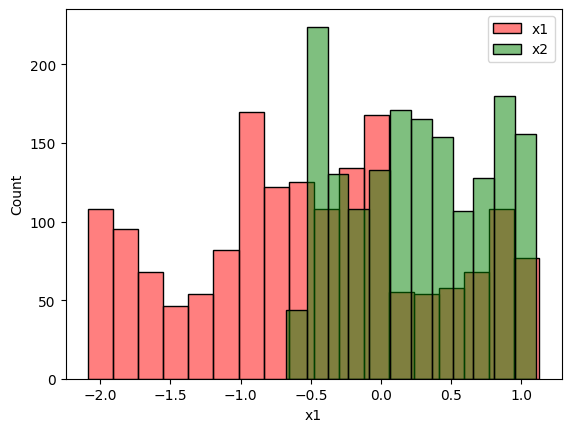

In [18]:
sns.histplot(data=df, x="x1", color="red", alpha=0.5, label="x1")
sns.histplot(data=df, x="x2", color="green", alpha=0.5, label="x2")
plt.legend()
plt.show()

Based on this plots, provide a description of your data:

Your response here: Se puede notar que existe una ligera concordancia entre las medidas de x1 y x2, siendo que los valores de x1 tienden a cargarse más del 0 hacia la parte negativa del -2, y los valores de x1 tienden a estar en el intérvalo de -0.5 a un poco más allá del 1. Solo existe cierta compatibilidad entre los datos en el intérvalo de x2. Entonces, x1 abarca los rangos de x1 y x2, pero x2 solo abarca su propio rango de valores.

Plot in the same figure the boxplot of the two variables 

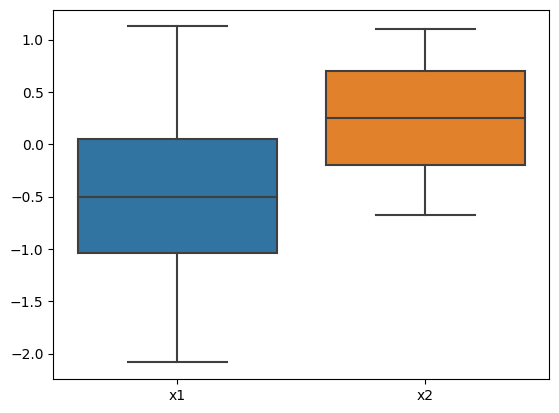

In [19]:
sns.boxplot(data=df[['x1', 'x2']])
plt.show()

Scatter plot of the two variables

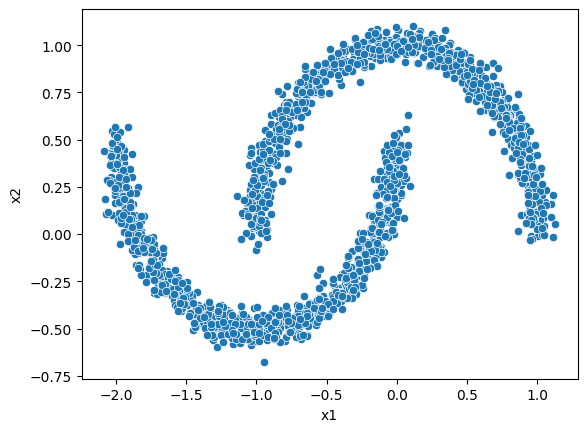

In [20]:
sns.scatterplot(x=df['x1'], y=df['x2'])
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response: En función del gráfico de cajas se puede apreciar la primera aproximación dentro de esta sección, ya que se logra reafirmar el rango de valores propios de cada variable. 

En función del último gráfico, se pueden apreciar cierto comportamiento en la medidas dentro de la toma de datos, que correspondería a un conjunto de datos propios de dos "funciones" distintas. Logrando entender que hay dos grupos dentro de estos datos.


## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [21]:
K  =  2
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(df)
yestimated = km.fit_predict(df)
yestimated

array([1, 1, 0, ..., 0, 0, 1])

Add to your dataset a column with the assihned cluster to each data point

In [22]:
df["Cluster"] = yestimated

Print the number associated to each cluster

In [23]:
print("Cluster: ",km.labels_)
print(df.Cluster.unique())
print(df)

Cluster:  [1 1 0 ... 0 0 1]
[1 0]
            x1        x2  Cluster
0    -2.010912  0.162208        1
1    -0.782666  0.607520        1
2     1.096009  0.157357        0
3    -0.818674  0.667581        1
4    -0.837438  0.429695        1
...        ...       ...      ...
1695  0.933084  0.208868        0
1696  0.455750  0.953701        0
1697 -0.689099  0.807105        0
1698  0.920377  0.059640        0
1699 -1.992337  0.449819        1

[1700 rows x 3 columns]


Print the centroids

In [24]:
print("Cluster centroids: ", km.cluster_centers_)

Cluster centroids:  [[ 0.19525491  0.5795137 ]
 [-1.20159595 -0.08139572]]


Print the intertia metric

In [25]:
print("SSE: ", km.inertia_)
print("Iterations: ", km.n_iter_)

SSE:  681.272918456524
Iterations:  7


Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

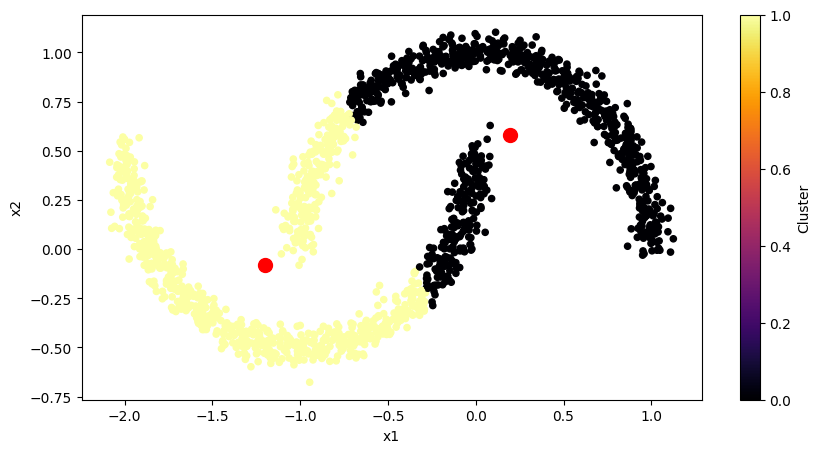

In [26]:
df.plot.scatter(x='x1', y='x2', c='Cluster', colormap='inferno', figsize=(10, 5))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', s=100)
plt.show()

### Questions 

Provides a detailed description of your results

Your response: Dentro de los resultados obtenidos, se puede observar que existe cierto error por parte del algoritmo en la determinación del cluster. Visualmente se aprecia con claridad que son dos clusters, sin embargo, el algoritmo al considerarlos por proximidad tiende a partir los datos respecto al clustering que se realiza visualmente.

Cabe destacar que se intuye el hecho de que es una buena aproximación de cantidad de clusters, ya que se logró determinar en una cantidad de iteraciones relativamente baja; sin embargo, poseé un SSE ligeramente alto, sin considerarse plenamente alarmante.

## A5 Elbow plot

Compute the Elbow plot

In [27]:
SSE = []
K = [1,2,3,4,5,6,7,8,9,10]
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df)
    SSE.append(km.inertia_)

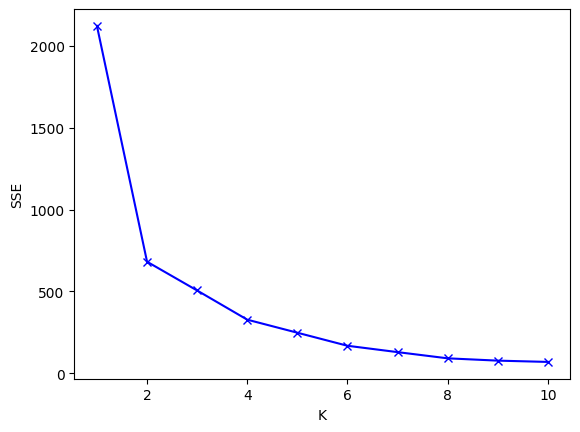

In [28]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response: Dentro del gráfico anterior, donde se logra apreciar el codo de manera más recalcada en el valor de K para 2. Aunque existe otro codo en el valor de K para 4, cuando es K igual a 2 se aprecia el codo con mayor claridad. Por tanto, se puede deducir que una correcta aproximación de cantidad de clusters es 2.


Does this number of clusters agree with your inital guess? (argue your response)

Your response: Sí, se logra comprobar que la aproximación inicial de dos Clusters es una buena determinación, gracias al gráfico anterior que lo señala, a pesar del valor del SSE dentro del mismo clustering.



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [29]:
from sklearn.datasets import make_blobs
data, yInitial = make_blobs(n_samples=740, n_features=3, centers=4, cluster_std=1.5, random_state=0)
data

array([[-0.5015199 ,  0.33807506,  4.13689332],
       [-3.27090496,  8.40075564,  2.69952096],
       [-2.27280656,  6.77434714, -1.7590994 ],
       ...,
       [ 2.33533707,  3.0119488 ,  4.92036495],
       [ 3.86068312,  6.52455951,  4.85660596],
       [ 0.3423    , -2.20761007,  3.52277907]])

2) Plot the scatter plot of your data using the real cluster labels

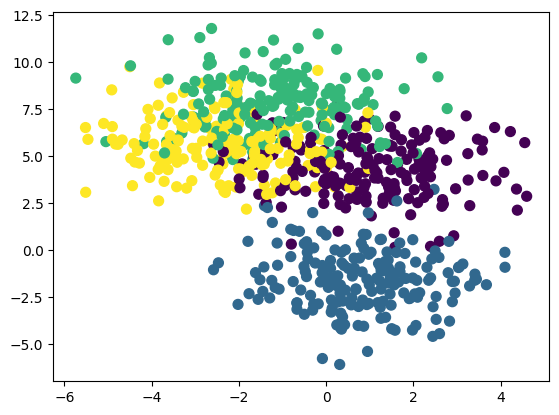

In [30]:
plt.scatter(data[:, 0], data[:, 1], c=yInitial, s=50, cmap='viridis')
plt.show()

3) Do K means clustering 

In [31]:
km = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(data)
yEstimated = km.fit_predict(data)
yEstimated

array([2, 3, 3, 3, 0, 1, 2, 0, 2, 3, 3, 2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1,
       0, 0, 0, 3, 1, 0, 2, 0, 0, 3, 2, 3, 3, 0, 0, 3, 2, 2, 0, 1, 1, 3,
       3, 0, 3, 1, 0, 1, 3, 2, 3, 0, 1, 2, 3, 0, 2, 3, 1, 2, 2, 1, 3, 1,
       0, 1, 2, 2, 2, 1, 3, 3, 1, 1, 3, 3, 2, 0, 3, 0, 2, 0, 3, 0, 0, 2,
       3, 1, 3, 0, 0, 2, 1, 1, 3, 1, 0, 1, 2, 3, 0, 0, 0, 3, 1, 1, 3, 2,
       3, 0, 0, 0, 3, 0, 1, 0, 2, 2, 2, 1, 2, 3, 2, 1, 2, 1, 0, 0, 2, 0,
       1, 1, 1, 2, 3, 0, 3, 0, 2, 3, 0, 1, 2, 0, 3, 0, 0, 0, 3, 3, 3, 3,
       2, 2, 0, 3, 1, 1, 1, 3, 0, 0, 3, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2,
       1, 1, 2, 0, 0, 2, 0, 0, 3, 2, 3, 0, 0, 1, 2, 3, 0, 3, 2, 1, 3, 0,
       2, 1, 2, 1, 2, 3, 0, 1, 1, 0, 2, 1, 1, 2, 3, 2, 0, 3, 2, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 3, 3, 0, 1, 0, 2, 0, 0, 3, 3, 1, 1, 1, 1, 1, 3,
       1, 3, 2, 3, 1, 3, 0, 3, 3, 0, 2, 2, 3, 3, 1, 2, 3, 1, 2, 2, 3, 1,
       2, 1, 1, 1, 2, 0, 3, 1, 2, 2, 2, 0, 1, 3, 2, 1, 0, 0, 3, 2, 1, 0,
       2, 3, 2, 0, 2, 1, 3, 0, 1, 3, 0, 1, 1, 2, 0,

4) Plot the scatter plot of your data using the estimated cluster labels

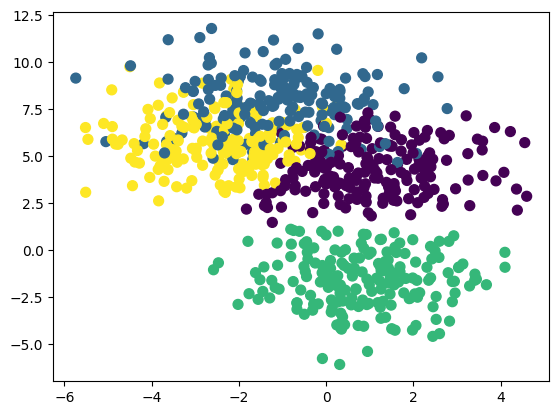

In [32]:
plt.scatter(data[:, 0], data[:, 1], c=yEstimated, s=50, cmap='viridis')
plt.show()

### Questions 

Provides a detailed description of your results.

Your response: Al momento de generar datos y posteriormente realizar el clustering, al momento de apreciar el primer ploteo de datos se aprecia cierto "caos" dentro de la agrupación de los datos. Al momento de aplicar KMeans, al tener este nuevo clustering se logra obtener un mayor orden dentro del ploteo de los datos.

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Considero que se logró un alto nivel en "Interpretación de Interacciones", ya que en las diferentes prácticas se logró estudiar cómo interatuaban las variables para determinación de respuestas. Siendo que se determinó ésta interacción en diversos casos, como lo es la relación en las medidas de la práctica de las Volteretas de Carro, la determinación de la relacion del Iris en función de las diversas medidas de las flores (sépalo y pétalo), y finalmente en estas mediciones propias de la Evidencia.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Considero que se logró un alto nivel en "Construcción de Modelos", ya que se lograron hacer representaciones de los análisis de los datos y su interpretación propia en torno a lo visual, denotando también que se logra el alto nivel en función de las conclusiones y análisis escritos desarrollados. Lo anterior, se demuestra en la construcción y explicación de modelos como lo es en las Volteretas de Carro, los Modelos de clasificación de Iris, y en lo propio a esta evidencia.